In [1]:
import numpy as np
from scipy import io, integrate, linalg, signal
from scipy.sparse.linalg import cg, eigs

In [2]:
a = np.array([1, 1, 2, 3, 5, 8, 13])
print(a.ndim)

1


In [3]:
print(a.size)

7


In [4]:
print(a.shape)

(7,)


In [5]:
print(a.shape[0])

7


In [6]:
a = np.array([[1.,2.,3.],[4.,5.,6.]])
print(a)

[[1. 2. 3.]
 [4. 5. 6.]]


In [7]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5], [11]])
c = np.array([[6, 7], [8, 9]])
d = np.array([[10], [12]])
res = np.block([[a, b], [c, d]])
print(res)

[[ 1  2  5]
 [ 3  4 11]
 [ 6  7 10]
 [ 8  9 12]]


In [11]:
a = np.arange(1, 13).reshape(2, 6)
print(a[-1])

[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]
[ 7  8  9 10 11 12]


In [14]:
a = np.arange(1, 26).reshape(5, 5)
print(a[1,4])

10


In [15]:
print(a[1, :])

[ 6  7  8  9 10]


In [16]:
print(a[0:5])

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]]


In [17]:
print(a[-5:])

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]]


In [18]:
print(a[0:3, 4:9])

[[ 5]
 [10]
 [15]]


In [19]:
a = np.arange(1, 76).reshape(5, 15)
print(a[np.ix_([1, 3, 4], [0, 2])])

[[16 18]
 [46 48]
 [61 63]]


In [20]:
print(a[2:21:2,:])

[[31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
 [61 62 63 64 65 66 67 68 69 70 71 72 73 74 75]]


In [21]:
print(a[::2, :])

[[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
 [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
 [61 62 63 64 65 66 67 68 69 70 71 72 73 74 75]]


In [22]:
print(a[::-1,:])

[[61 62 63 64 65 66 67 68 69 70 71 72 73 74 75]
 [46 47 48 49 50 51 52 53 54 55 56 57 58 59 60]
 [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
 [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]]


In [23]:
print(a[np.r_[:len(a),0]])

[[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30]
 [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
 [46 47 48 49 50 51 52 53 54 55 56 57 58 59 60]
 [61 62 63 64 65 66 67 68 69 70 71 72 73 74 75]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]]


In [24]:
a.transpose()

array([[ 1, 16, 31, 46, 61],
       [ 2, 17, 32, 47, 62],
       [ 3, 18, 33, 48, 63],
       [ 4, 19, 34, 49, 64],
       [ 5, 20, 35, 50, 65],
       [ 6, 21, 36, 51, 66],
       [ 7, 22, 37, 52, 67],
       [ 8, 23, 38, 53, 68],
       [ 9, 24, 39, 54, 69],
       [10, 25, 40, 55, 70],
       [11, 26, 41, 56, 71],
       [12, 27, 42, 57, 72],
       [13, 28, 43, 58, 73],
       [14, 29, 44, 59, 74],
       [15, 30, 45, 60, 75]])

In [25]:
a.conj().transpose()

array([[ 1, 16, 31, 46, 61],
       [ 2, 17, 32, 47, 62],
       [ 3, 18, 33, 48, 63],
       [ 4, 19, 34, 49, 64],
       [ 5, 20, 35, 50, 65],
       [ 6, 21, 36, 51, 66],
       [ 7, 22, 37, 52, 67],
       [ 8, 23, 38, 53, 68],
       [ 9, 24, 39, 54, 69],
       [10, 25, 40, 55, 70],
       [11, 26, 41, 56, 71],
       [12, 27, 42, 57, 72],
       [13, 28, 43, 58, 73],
       [14, 29, 44, 59, 74],
       [15, 30, 45, 60, 75]])

In [27]:
b = np.arange(1, 16).reshape(15, 1)
a @ b

array([[1240],
       [3040],
       [4840],
       [6640],
       [8440]])

In [29]:
a = np.arange(1, 5).reshape(2, 2)
b = np.arange(11, 15).reshape(2, 2)
a * b

array([[11, 24],
       [39, 56]])

In [30]:
a / b

array([[0.09090909, 0.16666667],
       [0.23076923, 0.28571429]])

In [31]:
a**3

array([[ 1,  8],
       [27, 64]])

In [32]:
(a > 0.5)

array([[ True,  True],
       [ True,  True]])

In [33]:
np.nonzero(a > 0.5)

(array([0, 0, 1, 1]), array([0, 1, 0, 1]))

In [35]:
v = np.array([0.4, 0.6])
a[:,np.nonzero(v > 0.5)[0]]

array([[2],
       [4]])

In [36]:
a[:, v.T > 0.5]

array([[2],
       [4]])

In [37]:
a = np.array([[0.1, 0.2, 3], [4, 0.5, 6], [7, 8, 9]])
a[a < 0.5]=0
print(a)

[[0.  0.  3. ]
 [4.  0.5 6. ]
 [7.  8.  9. ]]


In [38]:
a = np.array([[0.1, 0.2, 3], [4, 0.5, 6], [7, 8, 9]])
a = a * (a > 0.5)
print(a)

[[0. 0. 3.]
 [4. 0. 6.]
 [7. 8. 9.]]


In [39]:
a[:] = 3
print(a)

[[3. 3. 3.]
 [3. 3. 3.]
 [3. 3. 3.]]


In [40]:
x = np.array([1, 2, 3])
y = x.copy()
y

array([1, 2, 3])

In [41]:
x = np.array([[1, 2, 3, 4], [7, 8, 9, 5], [8, 7, 6, 6]])
y = x[1, :].copy()
y

array([7, 8, 9, 5])

In [42]:
x = np.array([[1, 2, 3, 4], [7, 8, 9, 5], [8, 7, 6, 6]])
y = x.flatten()
y

array([1, 2, 3, 4, 7, 8, 9, 5, 8, 7, 6, 6])

In [43]:
x = np.arange(1., 11.)
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [44]:
x = np.arange(10.)
x

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [45]:
x = np.arange(1.,11.)[:, np.newaxis]
x

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]])

In [46]:
x = np.zeros((3, 4))
x

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [47]:
x = np.zeros((3, 4, 5))
x

array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]])

In [48]:
x = np.ones((3, 4))
x


array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [49]:
x = np.eye(3)
x

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [50]:
a = np.arange(1, 5).reshape(2, 2)
x = np.diag(a)
x

array([1, 4])

In [51]:
v = np.arange(1, 3)
x = np.diag(v, 0)
x

array([[1, 0],
       [0, 2]])

In [52]:
from numpy.random import default_rng
rng = default_rng(42)
x = rng.random((3, 4))
x
# rng

array([[0.77395605, 0.43887844, 0.85859792, 0.69736803],
       [0.09417735, 0.97562235, 0.7611397 , 0.78606431],
       [0.12811363, 0.45038594, 0.37079802, 0.92676499]])

In [53]:
x = np.linspace(1,3,4)
x

array([1.        , 1.66666667, 2.33333333, 3.        ])

In [54]:
np.mgrid[0:9.,0:6.]

array([[[0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1.],
        [2., 2., 2., 2., 2., 2.],
        [3., 3., 3., 3., 3., 3.],
        [4., 4., 4., 4., 4., 4.],
        [5., 5., 5., 5., 5., 5.],
        [6., 6., 6., 6., 6., 6.],
        [7., 7., 7., 7., 7., 7.],
        [8., 8., 8., 8., 8., 8.]],

       [[0., 1., 2., 3., 4., 5.],
        [0., 1., 2., 3., 4., 5.],
        [0., 1., 2., 3., 4., 5.],
        [0., 1., 2., 3., 4., 5.],
        [0., 1., 2., 3., 4., 5.],
        [0., 1., 2., 3., 4., 5.],
        [0., 1., 2., 3., 4., 5.],
        [0., 1., 2., 3., 4., 5.],
        [0., 1., 2., 3., 4., 5.]]])

In [55]:
np.ix_(np.r_[0:9.],np.r_[0:6.])

(array([[0.],
        [1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.]]),
 array([[0., 1., 2., 3., 4., 5.]]))

In [56]:
np.meshgrid([1,2,4],[2,4,5])

[array([[1, 2, 4],
        [1, 2, 4],
        [1, 2, 4]]),
 array([[2, 2, 2],
        [4, 4, 4],
        [5, 5, 5]])]

In [57]:
np.ix_([1,2,4],[2,4,5])

(array([[1],
        [2],
        [4]]),
 array([[2, 4, 5]]))

In [59]:
a = np.array([[1, 2], [3, 4]])
m, n = 2, 2 
result = np.tile(a, (m, n))
print(result)

[[1 2 1 2]
 [3 4 3 4]
 [1 2 1 2]
 [3 4 3 4]]


In [60]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [3, 4]])
result = np.concatenate((a, b), 1)
print(result)

[[1 2 5 6]
 [3 4 3 4]]


In [61]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])
result = np.concatenate((a, b))
print(result)

[[1 2]
 [3 4]
 [5 6]
 [7 8]]


In [62]:
a = np.array([[1, 2], [3, 4]])
print(a.max())

4


In [63]:
a = np.arange(1, 10).reshape(3, 3)
print(a.max(0))

[7 8 9]


In [64]:
a = np.arange(1, 10).reshape(3, 3)
print(a.max(1))

[3 6 9]


In [65]:
a = np.arange(1, 10).reshape(3, 3)
b = np.arange(7, 16).reshape(3, 3)
print(np.maximum(a, b))

[[ 7  8  9]
 [10 11 12]
 [13 14 15]]


In [66]:
v = np.array([1, 2, 3])
print(np.sqrt(v @ v))

3.7416573867739413


In [67]:
a = np.array([0, 1, 1])
b = np.array([0, 0, 1])
print(np.logical_and(a,b))

[False False  True]


In [68]:
a = np.array([0, 1, 1])
b = np.array([0, 0, 1])
print(np.logical_or(a,b))

[False  True  True]


In [69]:
a = np.array([0, 1, 1])
b = np.array([0, 0, 1])
print(a & b)

[0 0 1]


In [70]:
a = np.array([0, 1, 1])
b = np.array([0, 0, 1])
print(a | b)

[0 1 1]


In [74]:
a = np.array([[2, 1, 8], [1, 2, 4], [3, 4, 9]])
print(np.linalg.inv(a))


[[-2.22222222e-01 -2.55555556e+00  1.33333333e+00]
 [-3.33333333e-01  6.66666667e-01  6.66133815e-17]
 [ 2.22222222e-01  5.55555556e-01 -3.33333333e-01]]


In [75]:
print(linalg.pinv(a))

[[-2.22222222e-01 -2.55555556e+00  1.33333333e+00]
 [-3.33333333e-01  6.66666667e-01  4.90335204e-17]
 [ 2.22222222e-01  5.55555556e-01 -3.33333333e-01]]


In [76]:
a = np.array([[2, 1, 3], [1, 2, 4], [3, 4, 9]])
print(np.linalg.matrix_rank(a))

3


In [77]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])
print(linalg.solve(a, b))

[[-3. -4.]
 [ 4.  5.]]


In [80]:
a = np.array([[1, 2, 3], [4, 5, 6]])
x = np.array([[7, 8], [9, 10], [11, 12]])
print(np.dot(a.T, x.T))

[[ 39  49  59]
 [ 54  68  82]
 [ 69  87 105]]


In [82]:
a = np.array([[1, 2, 3], [4, 5, 6]])
U, S, Vh = np.linalg.svd(a)
V = Vh.T

print(U)
print(S)
print(V)

[[-0.3863177  -0.92236578]
 [-0.92236578  0.3863177 ]]
[9.508032   0.77286964]
[[-0.42866713  0.80596391  0.40824829]
 [-0.56630692  0.11238241 -0.81649658]
 [-0.7039467  -0.58119908  0.40824829]]


In [84]:
a = np.array([[4, 2, 2], [2, 5, 4], [2, 4, 6]])
print(np.linalg.cholesky(a))

[[2.        0.        0.       ]
 [1.        2.        0.       ]
 [1.        1.5       1.6583124]]


In [85]:
a = np.array([[4, 2], [1, 3]])
D, V = np.linalg.eig(a)
print(D)
print(V)

[5. 2.]
[[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]


In [87]:
from scipy.linalg import eig
a = np.array([[4, 2], [1, 3]])
b = np.array([[1, 0], [3, 2]])
D, V = eig(a, b)
print(D)
print(V)


[1.25+1.85404962j 1.25-1.85404962j]
[[-0.46822587-0.21778705j -0.46822587+0.21778705j]
 [ 0.84570457-0.1345998j   0.84570457+0.1345998j ]]


In [88]:
a = np.array([[1, 2], [3, 4]])
D,V = eigs(a, k=3)
print(D)
print(V)

[-0.37228132+0.j  5.37228132+0.j]
[[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]


/home/claire/anaconda3/lib/python3.10/site-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:1272: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  warnings.warn("k >= N - 1 for N * N square matrix. "


In [89]:
a = np.array([[1, 2], [3, 4]])
Q,R = linalg.qr(a)
print(Q)
print(R)

[[-0.31622777 -0.9486833 ]
 [-0.9486833   0.31622777]]
[[-3.16227766 -4.42718872]
 [ 0.         -0.63245553]]


In [90]:
from scipy.linalg import lu
a = np.array([[4, 2, 3], [1, 7, 5], [0, 2, 8]])
P, L, U = lu(a)
print(P)
print(L)
print(U)


[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1.         0.         0.        ]
 [0.25       1.         0.        ]
 [0.         0.30769231 1.        ]]
[[4.         2.         3.        ]
 [0.         6.5        4.25      ]
 [0.         0.         6.69230769]]


In [91]:
from scipy.sparse.linalg import cg
A = np.array([[4, 1], [1, 3]])
b = np.array([1, 2])
x = cg(A, b)
print(x)


(array([0.09090909, 0.63636364]), 0)


In [92]:
a = np.array([0, 1, 2, 3])
fft_res = np.fft.fft(a)
print(fft_res)

[ 6.+0.j -2.+2.j -2.+0.j -2.-2.j]


In [93]:
a = np.array([0, 1, 2, 3])
ifft_res = np.fft.ifft(a)
print(ifft_res)

[ 1.5+0.j  -0.5-0.5j -0.5+0.j  -0.5+0.5j]


In [94]:
a = np.random.rand(6, 2)
print(np.sort(a))

[[0.24239251 0.54075946]
 [0.26316468 0.92514023]
 [0.58454291 0.87837577]
 [0.16511114 0.71816365]
 [0.14994652 0.44934812]
 [0.1360358  0.83344595]]


In [178]:
a = np.random.rand(4, 6)
print(np.sort(a, axis=1))

[[0.12591439 0.21461916 0.32141987 0.32923269 0.6101244  0.65337994]
 [0.16121115 0.25021996 0.68466515 0.69074305 0.83850168 0.89517244]
 [0.21129467 0.25781492 0.67937834 0.73911646 0.81155867 0.9722854 ]
 [0.7217329  0.82466758 0.83530122 0.93064739 0.96859565 0.98417749]]


In [96]:
a = np.array([[3, 5], [1, 4], [2, 3]])
I = np.argsort(a[:, 0])
b = a[I, :]
print(a)
print(b)

[[3 5]
 [1 4]
 [2 3]]
[[1 4]
 [2 3]
 [3 5]]


In [101]:
Z = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([5, 7, 20])

x, resi, rank, s = np.linalg.lstsq(Z, y, rcond=None)

print(x)

[ 4.33333333 -0.58333333]


In [103]:
from scipy import signal
x = np.array([1, 2, 3, 4, 5, 6])
q = 4
resampled_x = signal.resample(x, int(np.ceil(len(x) / q)))
print(resampled_x)

[2.5 4.5]


In [104]:
a = np.array([2, 2, 1, 3])
print(np.unique(a))

[1 2 3]


In [183]:
a = np.array([[[1, 2, 3]]])
print(np.squeeze(a))

[1 2 3]


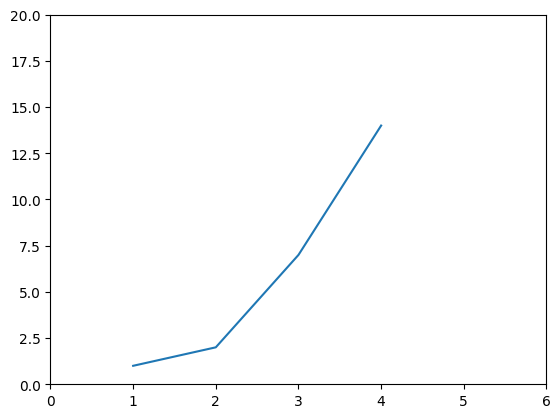

In [184]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4], [1,2,7,14])
plt.axis([0, 6, 0, 20])
plt.show()

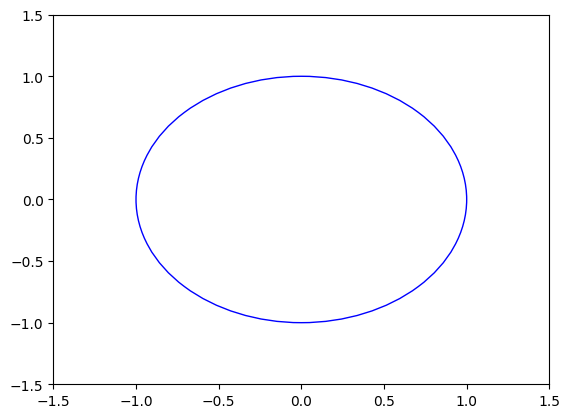

In [111]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
center = (0, 0)
radius = 1
circle = plt.Circle(center, radius, fill=False, edgecolor='blue')
ax.add_patch(circle)
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
plt.show()
